In [209]:
import pandas as pd
import re
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
from matplotlib import rc
import seaborn as sns

In [210]:
font = {'size' : 15}

rc('font', **font)

In [211]:
# Colors and their names
colors_dict = {
    "Dark Pink": "#A3107C",
    "Medium Blue": "#23a1e0",
    "Light Green": "#8cb63c",
    "Teal": "#009682",
    "Dark Gray": "#404040",
    "Blue": "#4664AA",
    "Brown": "#A7822E",
    "Red": "#d9271f",
    "Orange": "#f4a500",
    "Yellow": "#fee900",
}

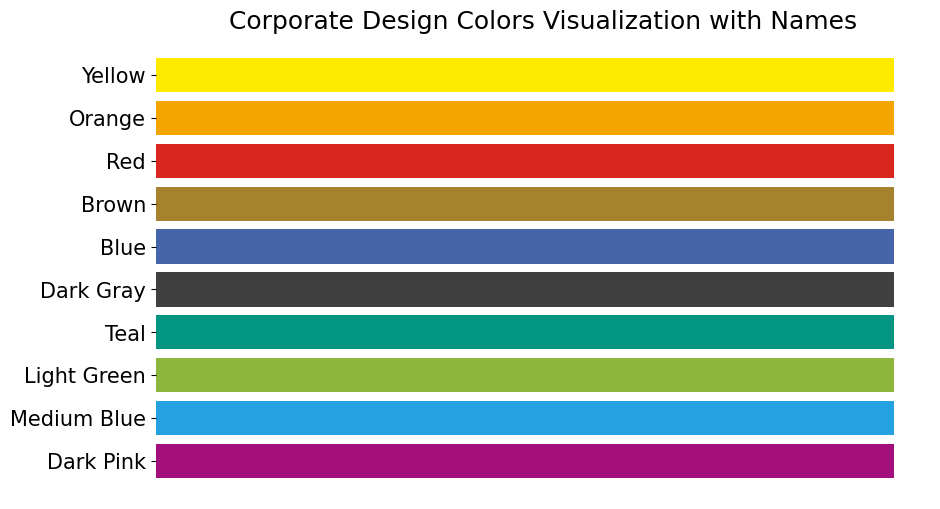

In [212]:
import matplotlib.pyplot as plt
import numpy as np


# Create a figure and a set of subplots
fig, ax = plt.subplots(figsize=(10, 6))

# Number of colors
num_colors = len(colors_dict)

# Create a bar for each color
bars = ax.barh(range(num_colors), np.ones(num_colors), color=list(colors_dict.values()), edgecolor='none')

# Add the color names as labels
ax.set_yticks(range(num_colors))
ax.set_yticklabels(list(colors_dict.keys()))

# Remove x-ticks, spines
ax.set_xticks([])
for spine in ax.spines.values():
    spine.set_visible(False)

# Set title
ax.set_title('Corporate Design Colors Visualization with Names')

plt.show()

In [213]:
def parse_line(line):
    # Extract values using regular expressions
    class_id = re.search(r'class_id = (\d+)', line).group(1)
    name = re.search(r'name = ([^,]+)', line).group(1).strip()
    ap = re.search(r'ap = ([\d.]+)%', line).group(1)
    tp = re.search(r'TP = (\d+)', line).group(1)
    fp = re.search(r'FP = (\d+)', line).group(1)
    
    # Convert percentage to decimal
    ap = float(ap) / 100
    
    return [int(class_id), name, ap, int(tp), int(fp)]

def txt_to_dataframe(file_path):
    with open(file_path, 'r') as file:
        lines = file.readlines()
    
    data = [parse_line(line) for line in lines if line.strip()]
    
    df = pd.DataFrame(data, columns=['class_id', 'name', 'ap', 'TP', 'FP'])
    
    return df



In [214]:
df_merged = txt_to_dataframe('results_merged.txt').sort_values(by='name')
df_unmerged = txt_to_dataframe('results_unmerged.txt').sort_values(by='name')
df_final = txt_to_dataframe('results_final.txt').sort_values(by='name')
df_clean = txt_to_dataframe('results_clean_train_test_split.txt').sort_values(by='name')


In [215]:
df_unmerged

,class_id,name,ap,TP,FP
28,28,alnatura_bio,0.4167,0,0
21,21,asc_fisch,0.9890,11,0
0,0,bio_hexagon,0.8869,101,22
24,24,bio_initiative_huhn_hahn,1.0000,8,3
5,5,bioland,0.7453,20,6
23,23,bw_bio,0.9459,12,5
30,30,demeter,0.6645,9,4
19,19,dop_eu,0.8652,12,4
1,1,eco_stars,0.9555,77,10
14,14,edeka_bio,0.7835,28,6


In [216]:
# Adjusted function to apply the color gradient based on actual occurring values in 'ap' column

def plot_average_precision(df, x_col='name', y_col='ap', title='Average Precision (AP) for Each Class', xlabel='Class Name', ylabel='Average Precision (AP)'):
    """
    Plots the average precision for each class with a custom color gradient based on actual occurring values in 'ap' column,
    using colors defined in a global `colors_dict`.

    Parameters:
    - df: DataFrame containing the data to plot.
    - x_col: The name of the column to use for the x-axis.
    - y_col: The name of the column to use for the y-axis.
    - title: The title of the plot.
    - xlabel: The label for the x-axis.
    - ylabel: The label for the y-axis.
    """
    # Create a figure and axes object
    fig, ax = plt.subplots(figsize=(14, 8))
    
    # Use colors from colors_dict to define the gradient
    custom_colors = [colors_dict['Red'], colors_dict['Teal']]  # From bad to good
    custom_cmap = LinearSegmentedColormap.from_list("custom_gradient", custom_colors, N=256)
    
    # Use actual occurring values in 'ap' column for normalization
    min_ap, max_ap = df[y_col].min(), df[y_col].max()
    norm = plt.Normalize(min_ap, max_ap)
    sm = plt.cm.ScalarMappable(cmap=custom_cmap, norm=norm)
    sm.set_array([])
    
    # Get colors from the custom colormap based on actual 'ap' values
    colors = sm.to_rgba(df[y_col])
    
    # Plot using seaborn with the axes object
    sns.barplot(x=x_col, y=y_col, data=df, palette=colors, ax=ax)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.set_title(title)
    
    # Manually add colorbar to the axes, adjusting label for actual 'ap' range
    cbar = fig.colorbar(sm, ax=ax, orientation='vertical')
    # cbar.set_label(f'Average Precision (AP) Range: {min_ap:.2f} to {max_ap:.2f}', rotation=270, labelpad=15)
    
    plt.tight_layout()
    # Replace spaces with underscores and remove special characters for the filename
    filename = title.replace(' ', '_').translate({ord(c): "" for c in "!@#$%^&*()[]{};:,./<>?\|`~-=+"})
    plt.savefig(f'visualizations/{filename}.png')  # Saves the plot with the title as filename
    plt.show()


<>:45: SyntaxWarning: invalid escape sequence '\|'
<>:45: SyntaxWarning: invalid escape sequence '\|'
C:\Users\Felix\AppData\Local\Temp\ipykernel_1412\2732373639.py:45: SyntaxWarning: invalid escape sequence '\|'
  filename = title.replace(' ', '_').translate({ord(c): "" for c in "!@#$%^&*()[]{};:,./<>?\|`~-=+"})


In [217]:
# Adjusted function to apply a uniform color to all bars and increase font size of axis labels

def plot_average_precision_new(df, x_col='name', y_col='ap', title='Average Precision (AP) for Each Class', xlabel='Class Name', ylabel='Average Precision (AP)'):
    """
    Plots the average precision for each class with all bars colored "Teal" and increased font size for axis labels,
    using colors defined in a global `colors_dict`.

    Parameters:
    - df: DataFrame containing the data to plot.
    - x_col: The name of the column to use for the x-axis.
    - y_col: The name of the column to use for the y-axis.
    - title: The title of the plot.
    - xlabel: The label for the x-axis.
    - ylabel: The label for the y-axis.
    """
    # Create a figure and axes object
    fig, ax = plt.subplots(figsize=(14, 8))
    
    # Plot using seaborn with the axes object, all bars colored "Teal"
    sns.barplot(x=x_col, y=y_col, data=df, color=colors_dict['Teal'], ax=ax)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=90, fontsize=14)  # Increased font size
    ax.set_xlabel(xlabel, fontsize=20)  # Increased font size
    ax.set_ylabel(ylabel, fontsize=20)  # Increased font size
    ax.set_title(title, fontsize=24)  # Optionally, increase title font size as well
    
    plt.tight_layout()
    # Replace spaces with underscores and remove special characters for the filename
    filename = title.replace(' ', '_').translate({ord(c): "" for c in "!@#$%^&*()[]{};:,./<>?\|`~-=+"})
    plt.savefig(f'visualizations/{filename}.png')  # Saves the plot with the title as filename
    plt.show()

<>:28: SyntaxWarning: invalid escape sequence '\|'
<>:28: SyntaxWarning: invalid escape sequence '\|'
C:\Users\Felix\AppData\Local\Temp\ipykernel_1412\4160424604.py:28: SyntaxWarning: invalid escape sequence '\|'
  filename = title.replace(' ', '_').translate({ord(c): "" for c in "!@#$%^&*()[]{};:,./<>?\|`~-=+"})


C:\Users\Felix\AppData\Local\Temp\ipykernel_1412\2732373639.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=x_col, y=y_col, data=df, palette=colors, ax=ax)
C:\Users\Felix\AppData\Local\Temp\ipykernel_1412\2732373639.py:33: UserWarning: Numpy array is not a supported type for `palette`. Please convert your palette to a list. This will become an error in v0.14
  sns.barplot(x=x_col, y=y_col, data=df, palette=colors, ax=ax)
C:\Users\Felix\AppData\Local\Temp\ipykernel_1412\2732373639.py:34: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90)


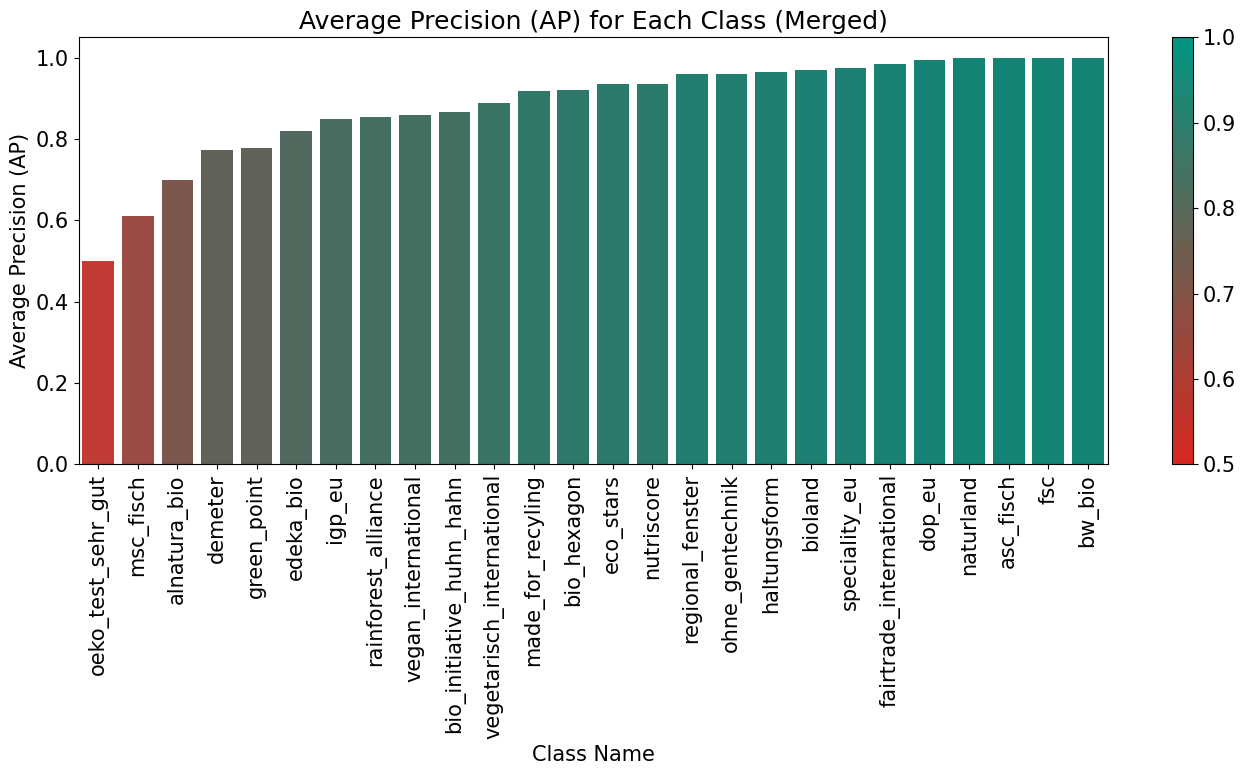

In [218]:
plot_average_precision(df_merged.sort_values("ap"), title='Average Precision (AP) for Each Class (Merged)')

C:\Users\Felix\AppData\Local\Temp\ipykernel_1412\2732373639.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=x_col, y=y_col, data=df, palette=colors, ax=ax)
C:\Users\Felix\AppData\Local\Temp\ipykernel_1412\2732373639.py:33: UserWarning: Numpy array is not a supported type for `palette`. Please convert your palette to a list. This will become an error in v0.14
  sns.barplot(x=x_col, y=y_col, data=df, palette=colors, ax=ax)
C:\Users\Felix\AppData\Local\Temp\ipykernel_1412\2732373639.py:34: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90)


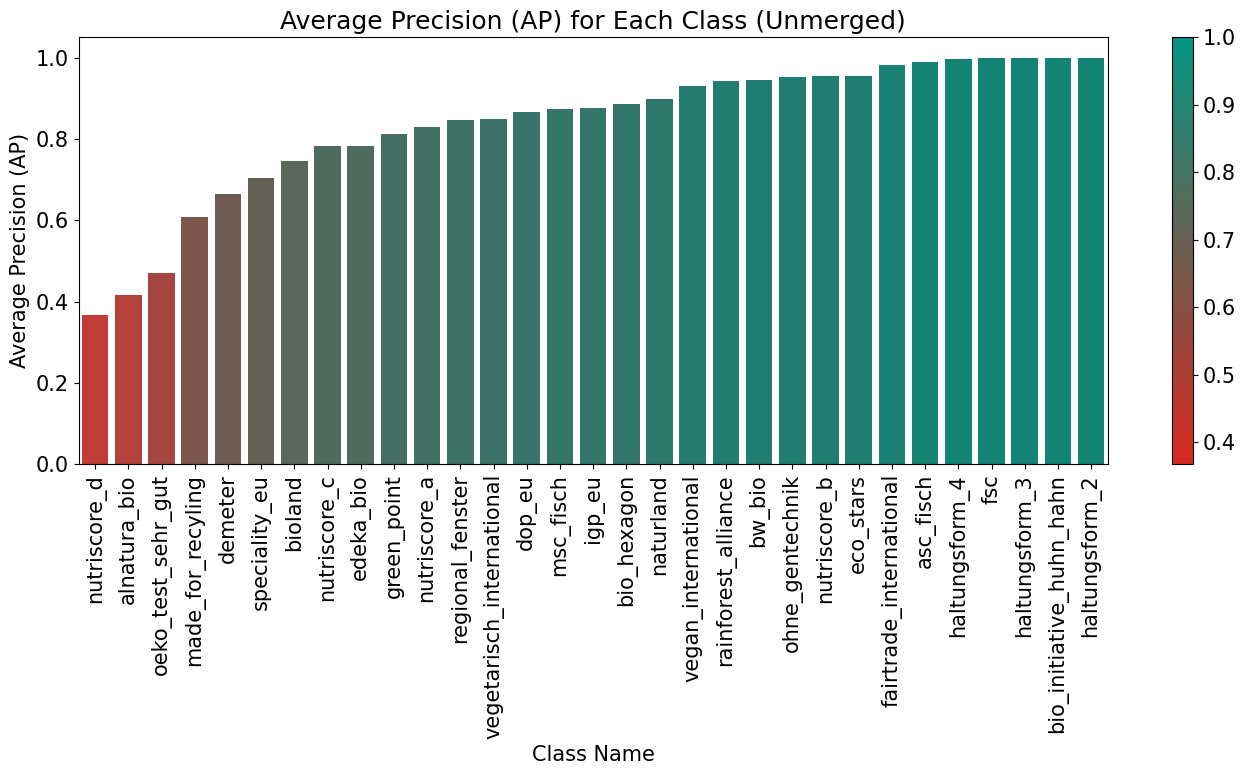

In [219]:
plot_average_precision(df_unmerged.sort_values("ap"), title='Average Precision (AP) for Each Class (Unmerged)')

C:\Users\Felix\AppData\Local\Temp\ipykernel_1412\2732373639.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=x_col, y=y_col, data=df, palette=colors, ax=ax)
C:\Users\Felix\AppData\Local\Temp\ipykernel_1412\2732373639.py:33: UserWarning: Numpy array is not a supported type for `palette`. Please convert your palette to a list. This will become an error in v0.14
  sns.barplot(x=x_col, y=y_col, data=df, palette=colors, ax=ax)
C:\Users\Felix\AppData\Local\Temp\ipykernel_1412\2732373639.py:34: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90)


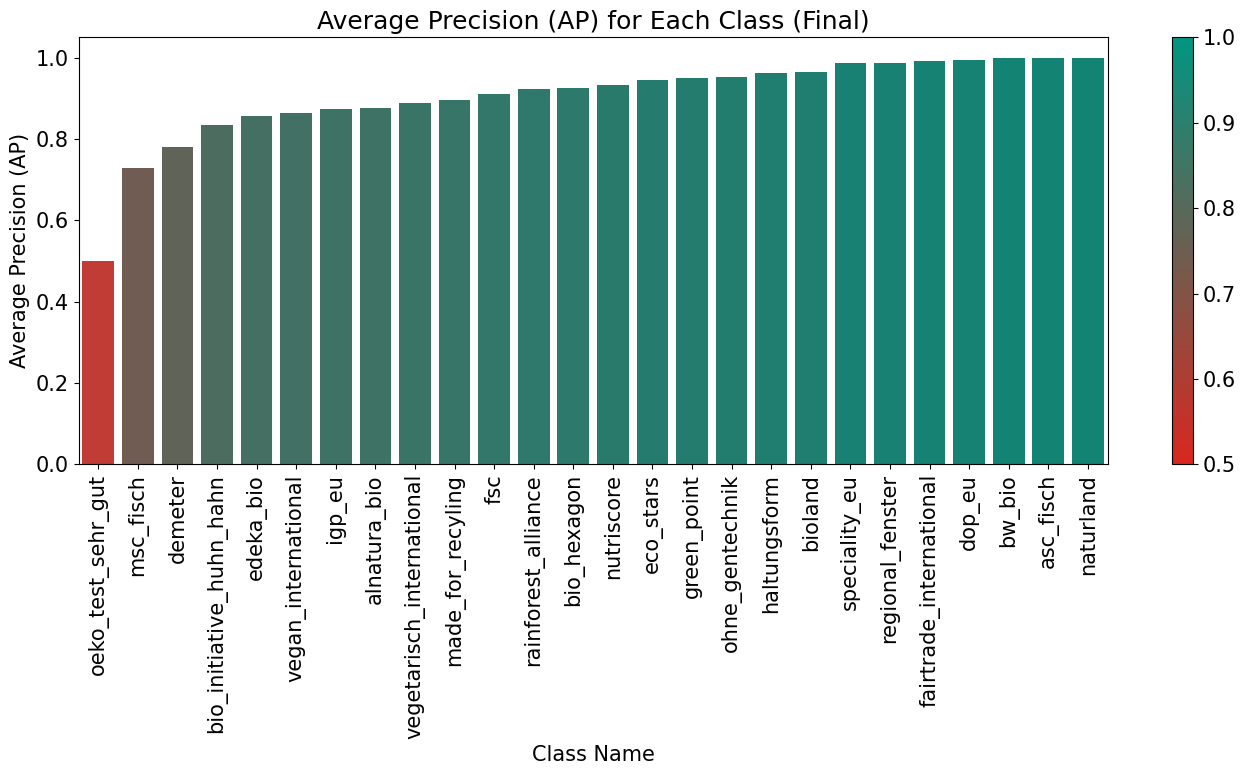

In [220]:
plot_average_precision(df_final.sort_values("ap"), title='Average Precision (AP) for Each Class (Final)')

In [221]:
def plot_multiple_ap_scores(dfs, df_labels, title = 'Average Precision (AP) for Each Class'):
    """
    Plots a grouped bar chart of AP scores for each class from multiple DataFrames, using colors from 'colors_dict'.
    
    Parameters:
    dfs (list of pd.DataFrame): List of DataFrames containing AP scores for classes.
    df_labels (list of str): List of labels corresponding to each DataFrame.
    """
    # Assuming 'colors_dict' is defined globally and contains color names as keys
    global colors_dict
    
    # Create a list of colors from 'colors_dict' values
    colors_list = list(colors_dict.values())
    
    # Ensure there are enough colors for the labels
    if len(df_labels) > len(colors_list):
        raise ValueError("Not enough colors in 'colors_dict' for each label in 'df_labels'")
    
    # Map each label to a color from 'colors_list'
    palette = {label: colors_list[i % len(colors_list)] for i, label in enumerate(df_labels)}
    
    # Combine all dataframes into a single dataframe
    combined_df = pd.DataFrame()
    for df, label in zip(dfs, df_labels):
        df_temp = df.copy()
        df_temp['source'] = label
        combined_df = pd.concat([combined_df, df_temp], ignore_index=True)
    
    # Create the bar plot with the defined palette
    plt.figure(figsize=(14, 8))
    sns.barplot(x='name', y='ap', hue='source', data=combined_df, palette=palette)
    plt.xticks(rotation=90)
    plt.xlabel('Class Name')
    plt.ylabel('Average Precision (AP)')
    plt.title(title)
    plt.legend(loc="upper right", ncol=3)
    plt.tight_layout()
    plt.ylim(0,1.19)
    # Replace spaces with underscores and remove special characters for the filename
    filename = title.replace(' ', '_').translate({ord(c): "" for c in "!@#$%^&*()[]{};:,./<>?\|`~-=+"})
    plt.savefig(f'visualizations/{filename}.png')  # Saves the plot with the title as filename
    plt.show()

<>:40: SyntaxWarning: invalid escape sequence '\|'
<>:40: SyntaxWarning: invalid escape sequence '\|'
C:\Users\Felix\AppData\Local\Temp\ipykernel_1412\1599388746.py:40: SyntaxWarning: invalid escape sequence '\|'
  filename = title.replace(' ', '_').translate({ord(c): "" for c in "!@#$%^&*()[]{};:,./<>?\|`~-=+"})


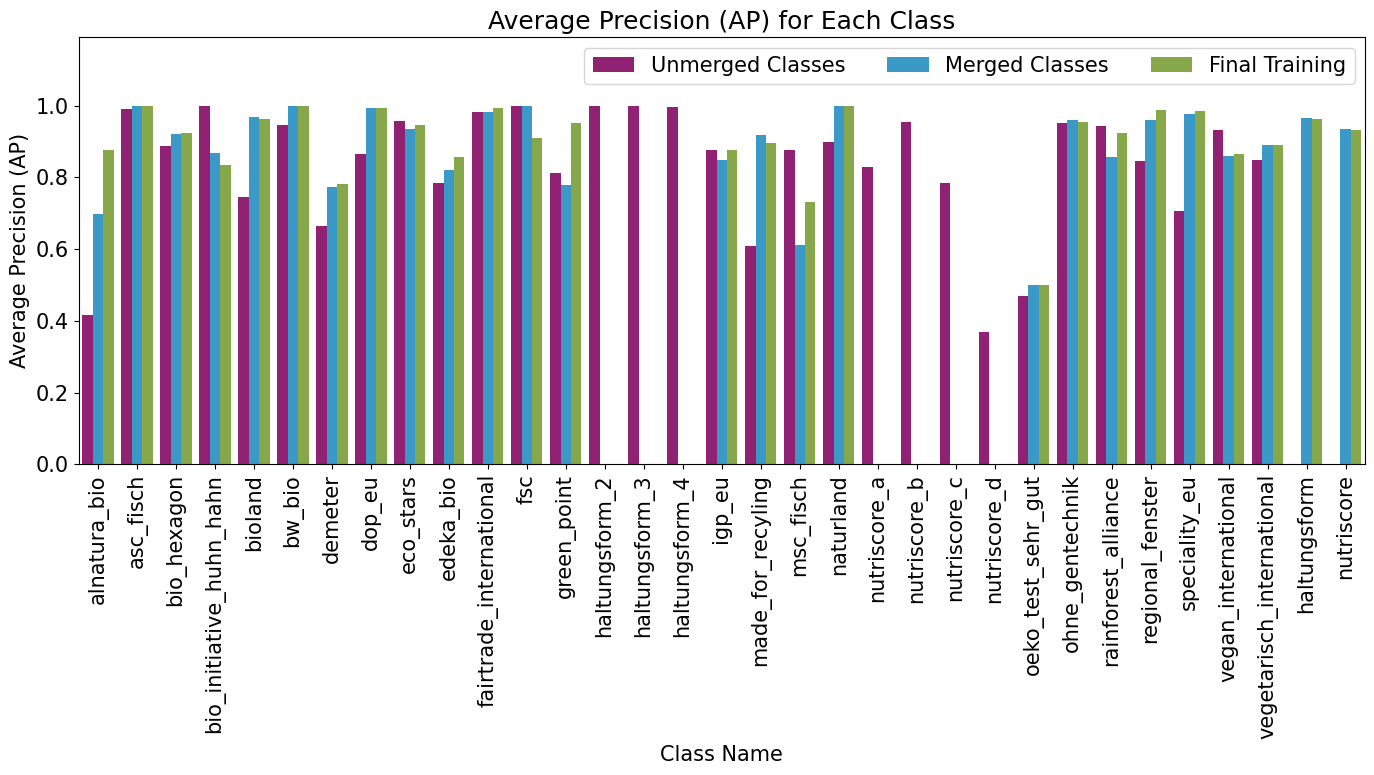

In [222]:
# Labels for the dataframes
df_labels = ['Unmerged Classes', 'Merged Classes', 'Final Training']

# Call the function with the example dataframes
plot_multiple_ap_scores([df_unmerged, df_merged, df_final], df_labels)


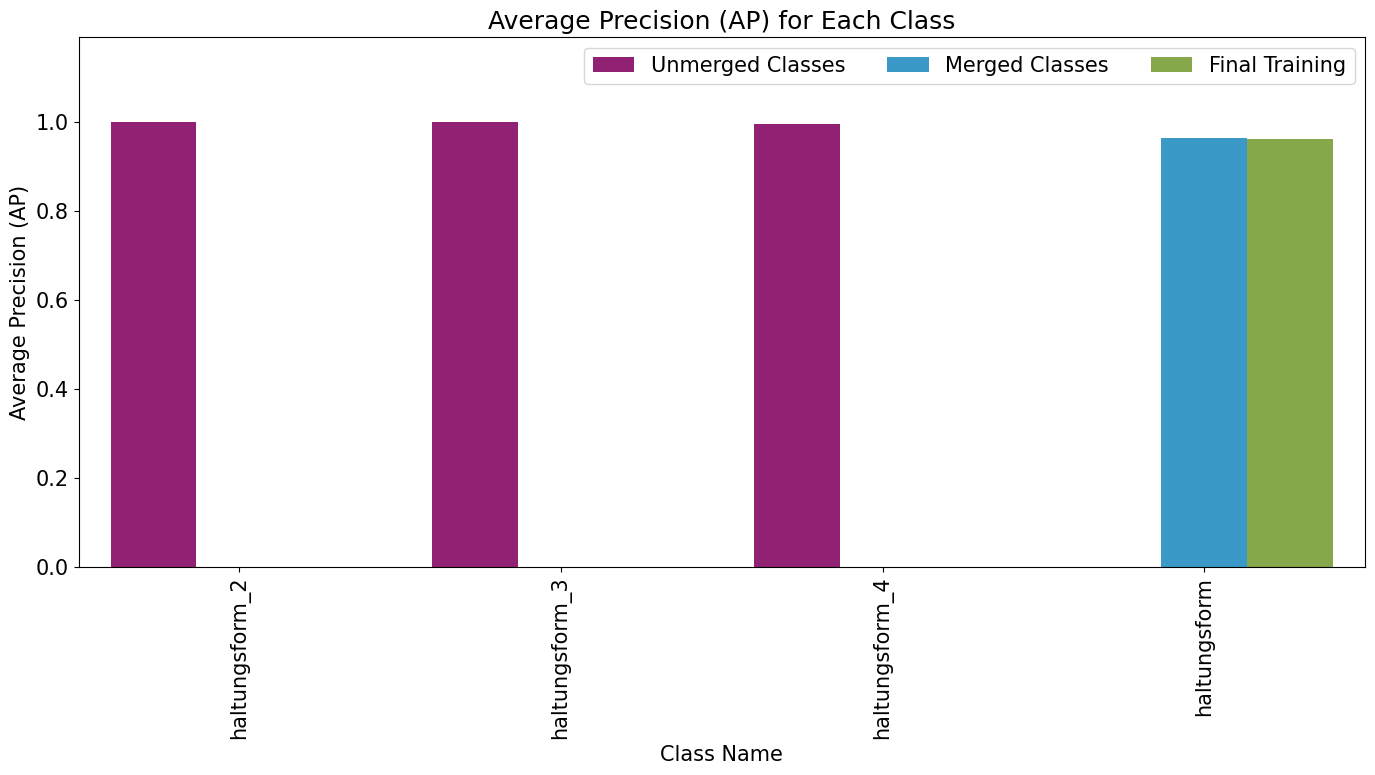

C:\Users\Felix\AppData\Local\Temp\ipykernel_1412\4160424604.py:21: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90, fontsize=14)  # Increased font size


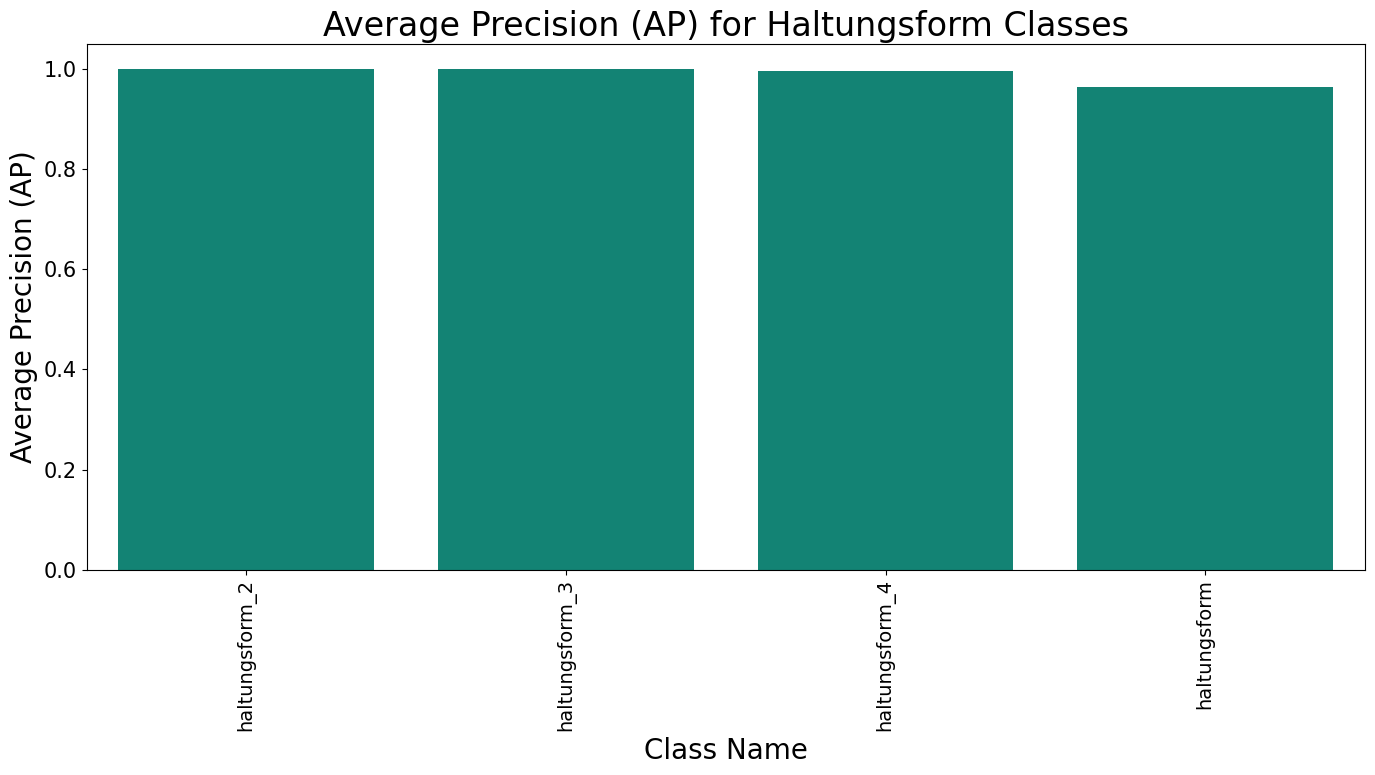

In [223]:
# Plot the effect on merged classes

df_haltungsform_unmerged = df_unmerged[df_unmerged['name'].str.contains('haltungsform')]  # Filter rows containing 'haltungsform'
df_haltungsform_merged = df_merged[df_merged['name'].str.contains('haltungsform')]  # Filter rows containing 'haltungsform'
df_haltungsform_final = df_final[df_final['name'].str.contains('haltungsform')]  # Filter rows containing 'haltungsform'


plot_multiple_ap_scores([df_haltungsform_unmerged, df_haltungsform_merged, df_haltungsform_final], df_labels)


# df_haltungsform_final['name'] = df_haltungsform_final['name'].str.replace('haltungsform', 'haltungsform_final')
df_haltungsform_combined = pd.concat([df_haltungsform_unmerged, df_haltungsform_merged], ignore_index=True)  # Combine all dataframes
# plot_average_precision(df_haltungsform_combined, title='Average Precision (AP) for Haltungsform Classes')
plot_average_precision_new(df_haltungsform_combined, title='Average Precision (AP) for Haltungsform Classes')



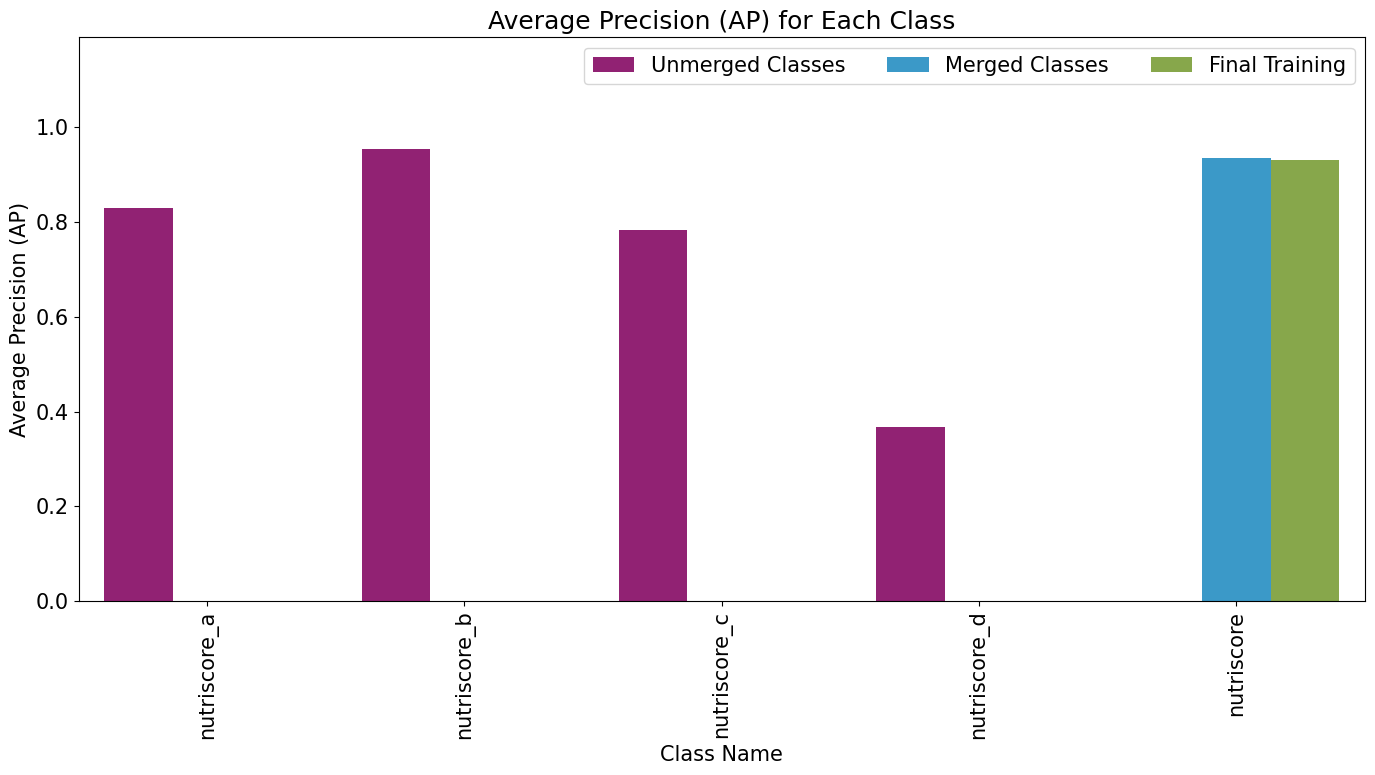

C:\Users\Felix\AppData\Local\Temp\ipykernel_1412\4160424604.py:21: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90, fontsize=14)  # Increased font size


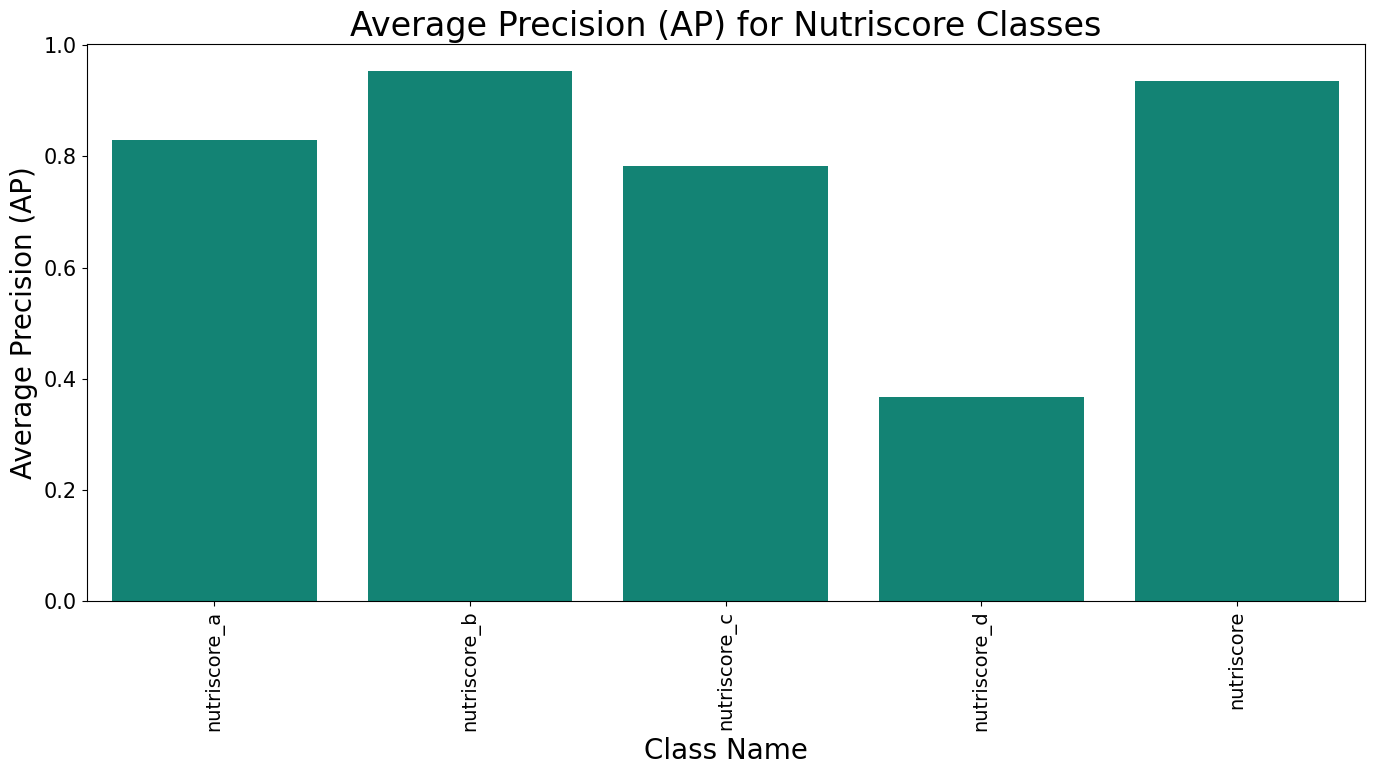

In [224]:
df_nutriscore_unmerged = df_unmerged[df_unmerged['name'].str.contains('nutriscore')]  # Filter rows containing 'nutriscore'
df_nutriscore_merged = df_merged[df_merged['name'].str.contains('nutriscore')]  # Filter rows containing 'nutriscore'
df_nutriscore_final = df_final[df_final['name'].str.contains('nutriscore')]  # Filter rows containing 'nutriscore'


plot_multiple_ap_scores([df_nutriscore_unmerged, df_nutriscore_merged, df_nutriscore_final], df_labels)

# df_nutriscore_final['name'] = df_nutriscore_final['name'].str.replace('nutriscore', 'nutriscore_final')
df_nutriscore_combined = pd.concat([df_nutriscore_unmerged, df_nutriscore_merged], ignore_index=True)  # Combine all dataframes
# plot_average_precision(df_nutriscore_combined, title='Average Precision (AP) for Nutriscore Classes')
plot_average_precision_new(df_nutriscore_combined, title='Average Precision (AP) for Nutriscore Classes')


# Confusion Matrix of Overal TP FP FN

In [225]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

def create_confusion_matrix(tp, fp, fn):
    """
    Creates a confusion matrix for an object detection model.
    
    Parameters:
    tp (int): Number of true positives
    fp (int): Number of false positives
    fn (int): Number of false negatives
    
    Returns:
    pd.DataFrame: Confusion matrix
    """
    # Define confusion matrix
    confusion_matrix = np.array([[tp, fp], [fn, 0]])
    
    # Define labels
    labels = ['Predicted Positive', 'Predicted Negative']
    categories = ['Actual Positive', 'Actual Negative']
    
    # Create DataFrame for heatmap
    df_cm = pd.DataFrame(confusion_matrix, index=categories, columns=labels)
    
    return df_cm

def plot_confusion_matrix(df_cm, title='Confusion Matrix'):
    """
    Plots the confusion matrix using a heatmap.
    
    Parameters:
    df_cm (pd.DataFrame): DataFrame containing confusion matrix
    title (str): Title for the confusion matrix plot
    """
    plt.figure(figsize=(8, 6))
    sns.heatmap(df_cm, annot=True, fmt='d', cmap='Blues', cbar=False, annot_kws={"size": 16})
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(title)
    # Replace spaces with underscores and remove special characters for the filename
    filename = title.replace(' ', '_').translate({ord(c): "" for c in "!@#$%^&*()[]{};:,./<>?\|`~-=+"})
    plt.savefig(f'visualizations/{filename}.png')  # Saves the plot with the title as filename
    plt.show()




<>:44: SyntaxWarning: invalid escape sequence '\|'
<>:44: SyntaxWarning: invalid escape sequence '\|'
C:\Users\Felix\AppData\Local\Temp\ipykernel_1412\4216734469.py:44: SyntaxWarning: invalid escape sequence '\|'
  filename = title.replace(' ', '_').translate({ord(c): "" for c in "!@#$%^&*()[]{};:,./<>?\|`~-=+"})


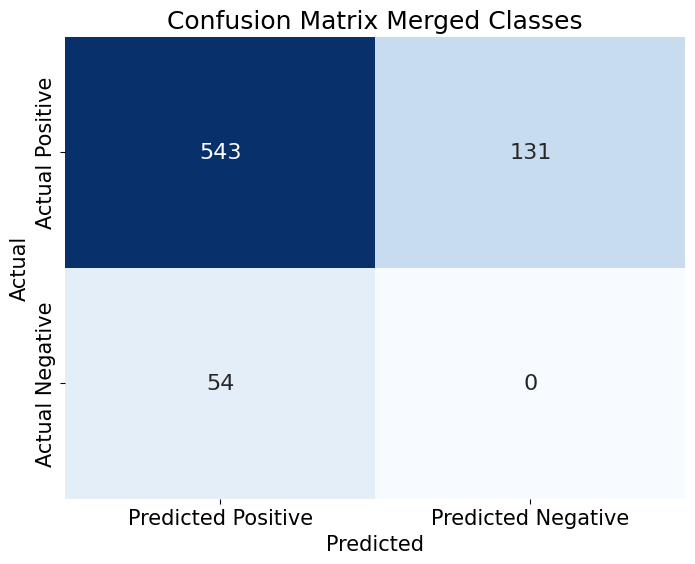

In [226]:
# Confusion matrix: merged classes
tp = 543
fp = 131
fn = 54

# Create confusion matrix
df_cm = create_confusion_matrix(tp, fp, fn)

# Plot confusion matrix with custom title
plot_confusion_matrix(df_cm, title='Confusion Matrix Merged Classes')

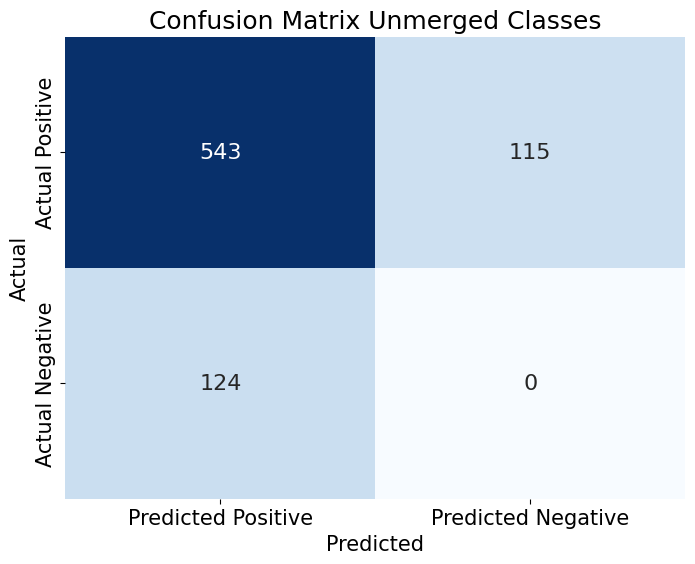

In [227]:
# Confusion matrix: unmerged classes
tp = 543
fp = 115
fn = 124

# Create confusion matrix
df_cm = create_confusion_matrix(tp, fp, fn)

# Plot confusion matrix with custom title
plot_confusion_matrix(df_cm, title='Confusion Matrix Unmerged Classes')

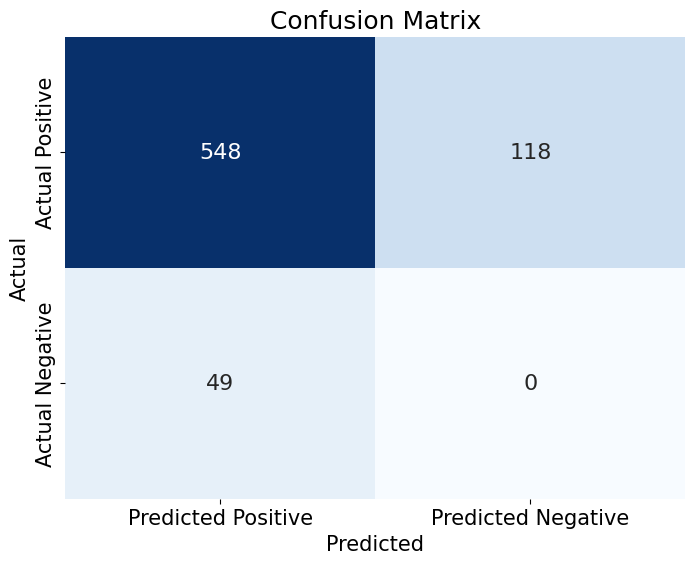

In [228]:
# Confusion matrix: final training
tp = 548
fp = 118
fn = 49

# Create confusion matrix
df_cm = create_confusion_matrix(tp, fp, fn)

# Plot confusion matrix with custom title
plot_confusion_matrix(df_cm, title='Confusion Matrix')

# Plots for df with clean train test split

C:\Users\Felix\AppData\Local\Temp\ipykernel_1412\4160424604.py:21: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90, fontsize=14)  # Increased font size


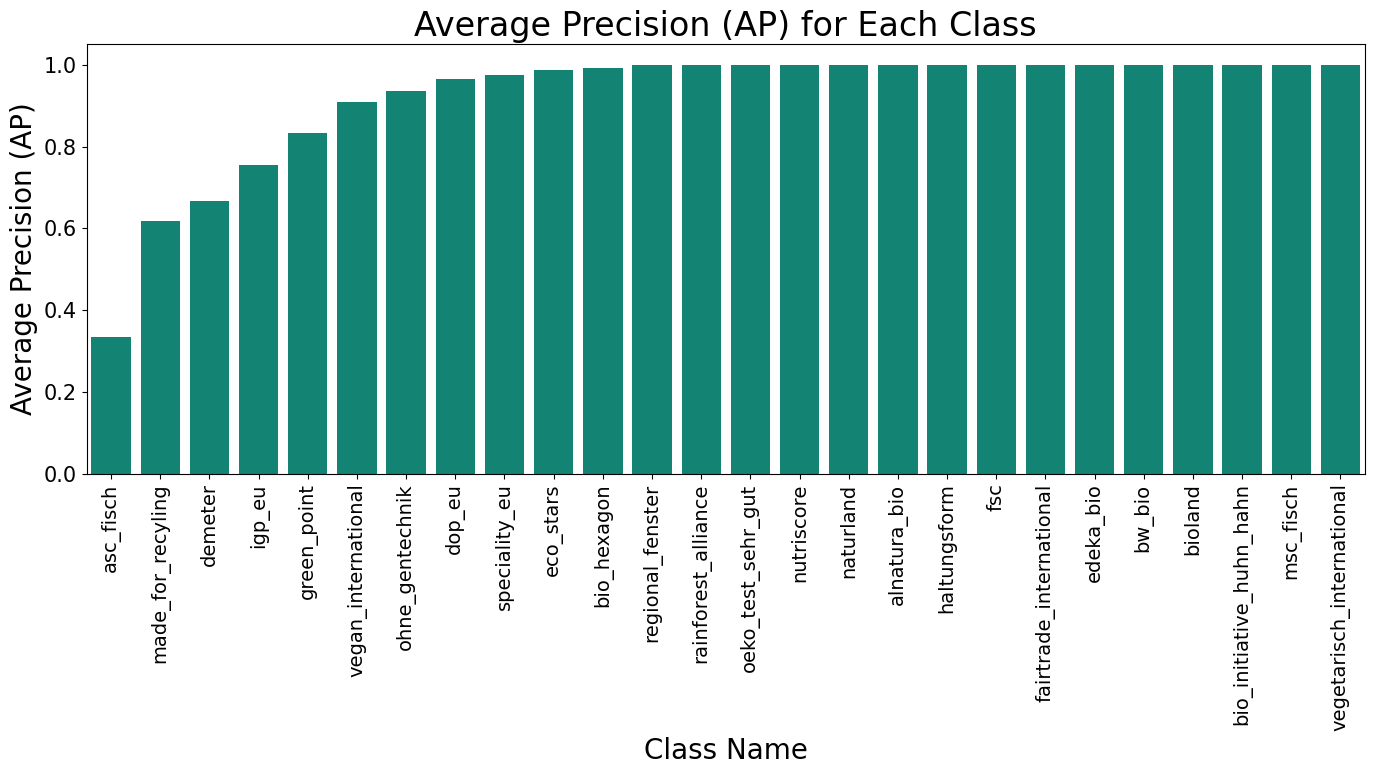

In [229]:
plot_average_precision_new(df_clean.sort_values("ap"), title='Average Precision (AP) for Each Class')

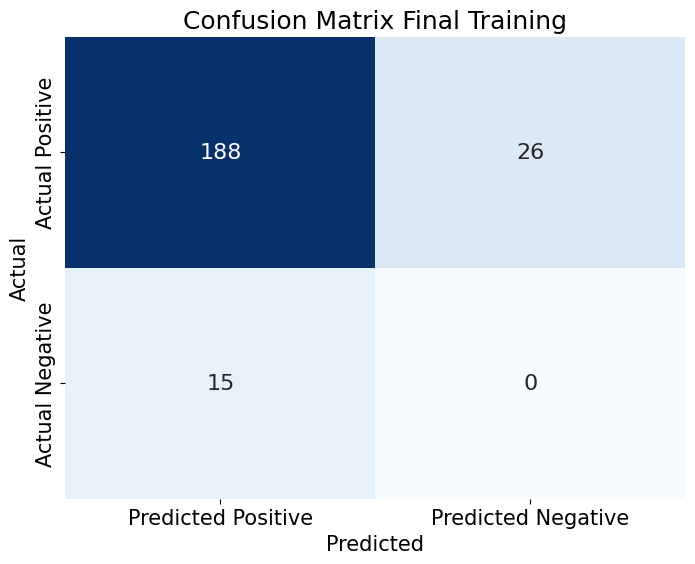

In [230]:
# Confusion matrix: final training
tp = 188
fp = 26
fn = 15

# Create confusion matrix
df_cm = create_confusion_matrix(tp, fp, fn)

# Plot confusion matrix with custom title
plot_confusion_matrix(df_cm, title='Confusion Matrix Final Training')

# Plot the relaitonship between number of samples and AP score

In [231]:
df_clean

,class_id,name,ap,TP,FP
23,23,alnatura_bio,1.0000,1,1
17,17,asc_fisch,0.3333,0,1
0,0,bio_hexagon,0.9933,24,2
20,20,bio_initiative_huhn_hahn,1.0000,6,5
5,5,bioland,1.0000,9,0
19,19,bw_bio,1.0000,7,0
25,25,demeter,0.6667,2,1
16,16,dop_eu,0.9643,7,1
1,1,eco_stars,0.9873,30,5
13,13,edeka_bio,1.0000,7,0


In [232]:
# Function to read the file and extract class names and occurrences
def extract_data_from_file(data_filename, classes_filename):
    class_names = []
    occurrences = []

    # Read class names into a list
    with open(classes_filename, 'r') as class_file:
        class_names_list = [line.strip() for line in class_file]

    with open(data_filename, 'r') as data_file:
        for line in data_file:
            if line.strip():  # Check if the line is not empty
                parts = line.split(':')
                id = int(parts[0].strip())
                class_names.append(class_names_list[id])
                occurrences.append(int(parts[1].strip()))

    return class_names, occurrences

# Replace 'your_data_file.txt' and 'classes.txt' with the actual filenames
data_filename = 'class_occurrences.txt'
classes_filename = 'classes.txt'
class_names, occurrences = extract_data_from_file(data_filename, classes_filename)

# Print the results
print("Class Names:", class_names)
print("Occurrences:", occurrences)


Class Names: ['bio_hexagon', 'eco_stars', 'vegan_international', 'fairtrade_international', 'rainforest_alliance', 'bioland', 'regional_fenster', 'ohne_gentechnik', 'naturland', 'nutriscore', 'haltungsform', 'speciality_eu', 'made_for_recyling', 'edeka_bio', 'fsc', 'igp_eu', 'dop_eu', 'asc_fisch', 'msc_fisch', 'bw_bio', 'bio_initiative_huhn_hahn', 'oeko_test_sehr_gut', 'vegetarisch_international', 'alnatura_bio', 'green_point', 'demeter']
Occurrences: [380, 250, 160, 60, 70, 100, 25, 110, 40, 240, 110, 45, 60, 75, 30, 115, 75, 35, 45, 20, 15, 15, 35, 35, 65, 40]


In [233]:
# Create a DataFrame
data = {
    "name": class_names,
    "occurrences": occurrences,
}

df_occurrences = pd.DataFrame(data).sort_values(by='name', ascending=True)  
df_occurrences

,name,occurrences
23,alnatura_bio,35
17,asc_fisch,35
0,bio_hexagon,380
20,bio_initiative_huhn_hahn,15
5,bioland,100
19,bw_bio,20
25,demeter,40
16,dop_eu,75
1,eco_stars,250
13,edeka_bio,75


In [234]:
df_clean = df_clean.sort_values(by='name', ascending=True)
df

,name,occurrences,ap_score
0,item1,10,0.80
1,item2,20,0.60
2,item3,30,0.90
3,item4,40,0.75
4,item5,50,0.85


In [235]:
data = {
    "name": df_occurrences['name'].values,
    "occurrences": df_occurrences['occurrences'].values,
    "ap_score": df_clean['ap'].values
}
df_occurrences_ap = pd.DataFrame(data).sort_values(by='name', ascending=True) 
df_occurrences_ap


,name,occurrences,ap_score
0,alnatura_bio,35,1.0000
1,asc_fisch,35,0.3333
2,bio_hexagon,380,0.9933
3,bio_initiative_huhn_hahn,15,1.0000
4,bioland,100,1.0000
5,bw_bio,20,1.0000
6,demeter,40,0.6667
7,dop_eu,75,0.9643
8,eco_stars,250,0.9873
9,edeka_bio,75,1.0000


In [236]:
# import matplotlib.pyplot as plt
# import pandas as pd

# # Colors and their names
# colors_dict = {
#     "Teal": "#009682",
#     "Medium Blue": "#23a1e0",
#     "Dark Gray": "#404040",
#     "Blue": "#4664AA",
#     "Light Green": "#8cb63c",
#     "Dark Pink": "#A3107C",
#     "Brown": "#A7822E",
#     "Red": "#d9271f",
#     "Orange": "#f4a500",
#     "Yellow": "#fee900",
# }



# # Create a scatter plot
# plt.figure(figsize=(10, 6))
# plt.scatter(df['occurrences'], df['ap_score'], color=colors_dict["Teal"])

# # Add labels for each point
# for i, txt in enumerate(df['name']):
#     plt.annotate(txt, (df['occurrences'][i], df['ap_score'][i]), textcoords="offset points", xytext=(0,10), ha='center')

# # Set the labels and title
# plt.xlabel('Number of Labels', fontsize=20)
# plt.ylabel('AP Score', fontsize=20)
# plt.title('Number of Labels vs AP Score', fontsize=24)

# # Increase font size of tick labels
# plt.tick_params(axis='both', which='major', labelsize=14)

# # Show the plot
# plt.savefig('visualizations/Number_of_Labels_vs_AP_Score.png')
# plt.show()

In [237]:
import matplotlib.pyplot as plt
import pandas as pd

# Colors and their names
colors_dict = {
    "Teal": "#009682",
    "Medium Blue": "#23a1e0",
    "Dark Gray": "#404040",
    "Blue": "#4664AA",
    "Light Green": "#8cb63c",
    "Dark Pink": "#A3107C",
    "Brown": "#A7822E",
    "Red": "#d9271f",
    "Orange": "#f4a500",
    "Yellow": "#fee900",
}

def create_scatter_plot(data, x_col, y_col, label_col, color_name, xlabel, ylabel, title):
    """
    Creates a scatter plot with the specified customizations.

    Parameters:
    - data: DataFrame containing the data to plot
    - x_col: Column name for the x-axis values
    - y_col: Column name for the y-axis values
    - label_col: Column name for the labels of the points
    - color_name: Name of the color to use for the points
    - xlabel: Label for the x-axis
    - ylabel: Label for the y-axis
    - title: Title of the plot
    """
    plt.figure(figsize=(10, 6))
    plt.scatter(data[x_col], data[y_col], color=colors_dict[color_name])

    # Add labels for each point
    for i, txt in enumerate(data[label_col]):
        plt.annotate(txt, (data[x_col][i], data[y_col][i]), textcoords="offset points", xytext=(0,10), ha='center')

    # Set the labels and title with hardcoded font sizes
    plt.xlabel(xlabel, fontsize=20)
    plt.ylabel(ylabel, fontsize=20)
    plt.title(title, fontsize=24)

    # Increase font size of tick labels
    plt.tick_params(axis='both', which='major', labelsize=14)

    # Save and show the plot
    plt.savefig('visualizations/Number_of_Labels_vs_AP_Score.png')
    plt.show()





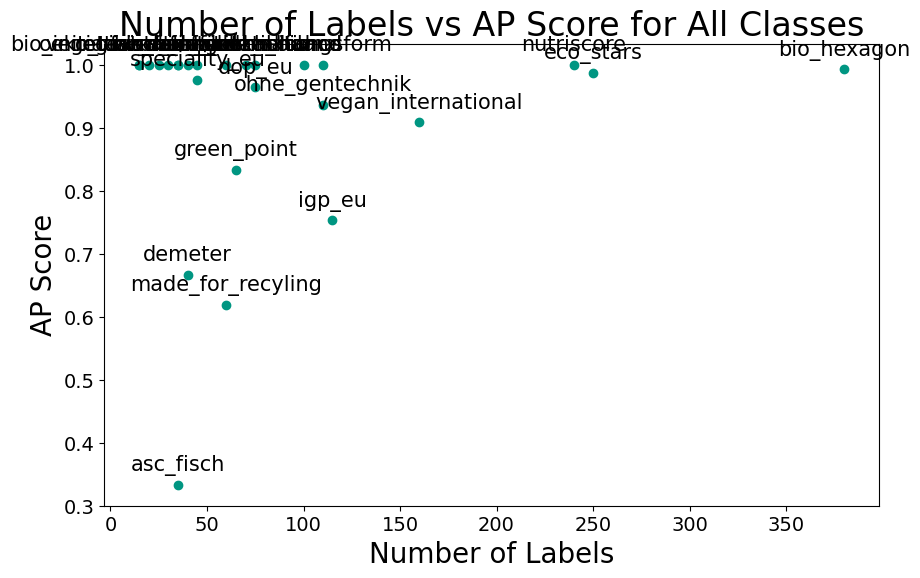

In [238]:
# Call the function to create the scatter plot
create_scatter_plot(df_occurrences_ap, 'occurrences', 'ap_score', 'name', 'Teal', 'Number of Labels', 'AP Score', 'Number of Labels vs AP Score for All Classes')

                  name  occurrences  ap_score
0            asc_fisch           35    0.3333
1    made_for_recyling           60    0.6190
2              demeter           40    0.6667
3               igp_eu          115    0.7538
4          green_point           65    0.8333
5  vegan_international          160    0.9091
6      ohne_gentechnik          110    0.9365


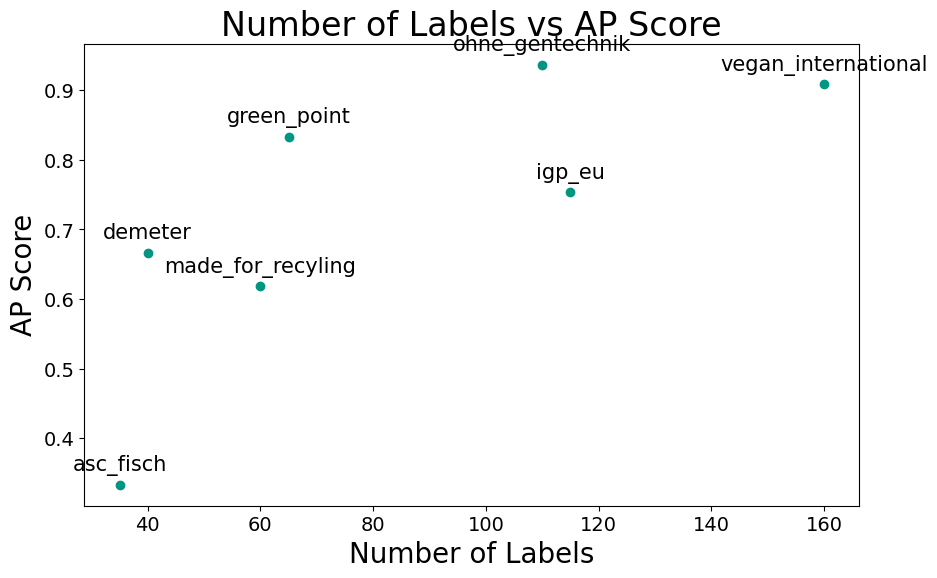

In [239]:
# Sort the DataFrame and select the top 7 rows with the lowest 'ap_score'
df_poor_performance = df_occurrences_ap.sort_values('ap_score', ascending=True)[:7]
# Reset the index of the sorted DataFrame
df_poor_performance.reset_index(drop=True, inplace=True)
print(df_poor_performance)
create_scatter_plot(df_poor_performance, 'occurrences', 'ap_score', 'name', 'Teal', 'Number of Labels', 'AP Score', 'Number of Labels vs AP Score')